In [18]:
import torch
import torch.nn as nn
import torch.jit

In [76]:
def graph_inputs(graph):
    """Returns inputs of graph as list of torch._C.Value"""
    return list(graph.inputs())

def graph_outputs(graph):
    """Returns outputs of graph as list of torch._C.Value"""
    return list(graph.outputs())

def val_size(val):
    return val.type().sizes()

def val_inputs(val):
    return list(val.node().inputs())

def val_outputs(val):
    return list(val.node().outputs())

def val_kind(val):
    return val.node().kind()

def val_is_tensor(val):
    return val.isCompleteTensor()

def val_debug_name(val):
    return val.debugName()

def val_scope_name(val):
    return val.node().scopeName()

def val_tensor(val):
    return val.node().t('value')

In [87]:
class MyModule(nn.Module):
    
    def __init__(self):
        super(MyModule, self).__init__()
        self.a = torch.randn(1, 3, 1, 1)
        
    def forward(self, *inputs):
#         x = inputs[0]
#         y = inputs[1]
#         y2 = inputs[1]
        return inputs[0] * self.a

In [88]:
model = MyModule()

data = torch.zeros((1, 3, 224, 224))

model_jit = torch.jit.trace(model, tuple([data, data]))

graph = model_jit.graph

TracingCheckError: Tracing failed sanity checks!
ERROR: Graphs differed across invocations!
	Graph diff:
		  graph(%self : ClassType<MyModule>,
		-       %data : Tensor,
		?        ^^^^
		+       %1 : Tensor,
		?        ^
		        %2 : Tensor):
		    %3 : Tensor = prim::Constant[value=(1,1,.,.) =    0.1354  (1,2,.,.) =    0.7176  (1,3,.,.) =   -1.7990 [ Variable[CPUFloatType]{1,3,1,1} ]](), scope: MyModule # <ipython-input-87-389b91ea9d51>:11:0
		-   %4 : Tensor = aten::mul(%data, %3), scope: MyModule # <ipython-input-87-389b91ea9d51>:11:0
		?                            ^^^^
		+   %4 : Tensor = aten::mul(%1, %3), scope: MyModule # <ipython-input-87-389b91ea9d51>:11:0
		?                            ^
		    return (%4)
	First diverging operator:
	Node diff:
		- %4 : Tensor = aten::mul(%data, %3), scope: MyModule # <ipython-input-87-389b91ea9d51>:11:0
		?                          ^^^^
		+ %4 : Tensor = aten::mul(%1, %3), scope: MyModule # <ipython-input-87-389b91ea9d51>:11:0
		?                          ^
	Trace source location:
		<ipython-input-87-389b91ea9d51>(11): forward
		/home/john/.local/lib/python3.6/site-packages/torch/nn/modules/module.py(531): _slow_forward
		/home/john/.local/lib/python3.6/site-packages/torch/nn/modules/module.py(545): __call__
		/home/john/.local/lib/python3.6/site-packages/torch/jit/__init__.py(904): trace_module
		/home/john/.local/lib/python3.6/site-packages/torch/jit/__init__.py(772): trace
		<ipython-input-88-7c6267a140af>(5): <module>
		/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py(3326): run_code
		/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py(3249): run_ast_nodes
		/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py(3058): run_cell_async
		/usr/local/lib/python3.6/dist-packages/IPython/core/async_helpers.py(68): _pseudo_sync_runner
		/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py(2881): _run_cell
		/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py(2855): run_cell
		/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py(536): run_cell
		/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py(294): do_execute
		/usr/local/lib/python3.6/dist-packages/tornado/gen.py(209): wrapper
		/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py(542): execute_request
		/usr/local/lib/python3.6/dist-packages/tornado/gen.py(209): wrapper
		/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py(272): dispatch_shell
		/usr/local/lib/python3.6/dist-packages/tornado/gen.py(209): wrapper
		/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py(365): process_one
		/usr/local/lib/python3.6/dist-packages/tornado/gen.py(748): run
		/usr/local/lib/python3.6/dist-packages/tornado/gen.py(787): inner
		/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py(743): _run_callback
		/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py(690): <lambda>
		/usr/lib/python3.6/asyncio/events.py(145): _run
		/usr/lib/python3.6/asyncio/base_events.py(1451): _run_once
		/usr/lib/python3.6/asyncio/base_events.py(438): run_forever
		/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py(148): start
		/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py(563): start
		/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py(658): launch_instance
		/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py(16): <module>
		/usr/lib/python3.6/runpy.py(85): _run_code
		/usr/lib/python3.6/runpy.py(193): _run_module_as_main
	Check source location:
		<ipython-input-87-389b91ea9d51>(11): forward
		/home/john/.local/lib/python3.6/site-packages/torch/nn/modules/module.py(531): _slow_forward
		/home/john/.local/lib/python3.6/site-packages/torch/nn/modules/module.py(545): __call__
		/home/john/.local/lib/python3.6/site-packages/torch/jit/__init__.py(904): trace_module
		/home/john/.local/lib/python3.6/site-packages/torch/jit/__init__.py(517): _check_trace
		/home/john/.local/lib/python3.6/site-packages/torch/autograd/grad_mode.py(49): decorate_no_grad
		/home/john/.local/lib/python3.6/site-packages/torch/jit/__init__.py(914): trace_module
		/home/john/.local/lib/python3.6/site-packages/torch/jit/__init__.py(772): trace
		<ipython-input-88-7c6267a140af>(5): <module>
		/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py(3326): run_code
		/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py(3249): run_ast_nodes
		/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py(3058): run_cell_async
		/usr/local/lib/python3.6/dist-packages/IPython/core/async_helpers.py(68): _pseudo_sync_runner
		/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py(2881): _run_cell
		/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py(2855): run_cell
		/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py(536): run_cell
		/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py(294): do_execute
		/usr/local/lib/python3.6/dist-packages/tornado/gen.py(209): wrapper
		/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py(542): execute_request
		/usr/local/lib/python3.6/dist-packages/tornado/gen.py(209): wrapper
		/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py(272): dispatch_shell
		/usr/local/lib/python3.6/dist-packages/tornado/gen.py(209): wrapper
		/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py(365): process_one
		/usr/local/lib/python3.6/dist-packages/tornado/gen.py(748): run
		/usr/local/lib/python3.6/dist-packages/tornado/gen.py(787): inner
		/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py(743): _run_callback
		/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py(690): <lambda>
		/usr/lib/python3.6/asyncio/events.py(145): _run
		/usr/lib/python3.6/asyncio/base_events.py(1451): _run_once
		/usr/lib/python3.6/asyncio/base_events.py(438): run_forever
		/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py(148): start
		/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py(563): start
		/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py(658): launch_instance
		/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py(16): <module>
		/usr/lib/python3.6/runpy.py(85): _run_code
		/usr/lib/python3.6/runpy.py(193): _run_module_as_main


In [86]:
graph

graph(%self : ClassType<MyModule>,
      %x : Float(1, 3, 224, 224),
      %y2 : Float(1, 3, 224, 224)):
  %9 : Float(1, 3, 1, 1) = prim::Constant[value=(1,1,.,.) =   -0.9970  (1,2,.,.) =    1.8650  (1,3,.,.) =    0.2835 [ Variable[CPUFloatType]{1,3,1,1} ]](), scope: MyModule # <ipython-input-84-b769829be4ab>:11:0
  %10 : Float(1, 3, 224, 224) = aten::mul(%x, %9), scope: MyModule # <ipython-input-84-b769829be4ab>:11:0
  %11 : Float(1, 3, 224, 224) = aten::mul(%10, %y2), scope: MyModule # <ipython-input-84-b769829be4ab>:11:0
  return (%11)

In [57]:
list(graph.inputs())

[self defined in (%self : ClassType<MyModule>, %x : Float(1, 3, 224, 224), %y : Float(1, 3, 224, 224) = prim::Param()
 ),
 x defined in (%self : ClassType<MyModule>, %x : Float(1, 3, 224, 224), %y : Float(1, 3, 224, 224) = prim::Param()
 ),
 y defined in (%self : ClassType<MyModule>, %x : Float(1, 3, 224, 224), %y : Float(1, 3, 224, 224) = prim::Param()
 )]

In [27]:
graph[-1]

graph(%self : ClassType<MyModule>,
      %x : Float(1, 3, 224, 224),
      %y : Float(1, 3, 224, 224)):
  %9 : Float(1, 3, 1, 1) = prim::Constant[value=(1,1,.,.) =   -0.4956  (1,2,.,.) =   -0.5579  (1,3,.,.) =   -0.2874 [ Variable[CPUFloatType]{1,3,1,1} ]](), scope: MyModule # <ipython-input-3-968050b14635>:8:0
  %10 : Float(1, 3, 224, 224) = aten::mul(%x, %9), scope: MyModule # <ipython-input-3-968050b14635>:8:0
  %11 : Float(1, 3, 224, 224) = aten::mul(%10, %y), scope: MyModule # <ipython-input-3-968050b14635>:8:0
  return (%11)

In [21]:
n = list(graph.nodes())[-1]

In [26]:
n.

TypeError: z(): incompatible function arguments. The following argument types are supported:
    1. (self: torch._C.Node, arg0: str) -> at::Tensor

Invoked with: %11 : Float(1, 3, 224, 224) = aten::mul(%10, %y), scope: MyModule # <ipython-input-3-968050b14635>:8:0


In [212]:
CONVERTERS = {}


def tensorrt_converter(method):
    def register_converter(converter):
        CONVERTERS[method] = converter
        return converter
    return register_converter


class Context():
    
    def __init__(self, graph, network, converters=CONVERTERS):
        self.graph = graph
        self.network = network
        self.tensors = {}
        self.converters = CONVERTERS

    def get_trt(self, val):
        print('Val %s' % val.debugName())
        if val.debugName() in self.tensors:
            return self.tensors[val.debugName()]  # get tensor directly
        elif val.node().kind() in self.converters:
            print('Calling converter for %s' % val.node().kind())
            self.converters[val.node().kind()](self, val.node())  # attempt recursive conversion
            return self.tensors[val.debugName()]  # tensor should now be set...
        else:
            raise KeyError('No converter found for %s' % val.node().kind())
    
    def set_trt(self, val, val_trt):
        if val.debugName() not in self.tensors:
            self.tensors[val.debugName()] = val_trt
        else:
            raise RuntimeException('TensorRT value already found in graph')

            
def torch2trt(model, data):
    
    model_jit = torch.jit.trace(model, data)
    graph = model_jit.graph
    
    logger = trt.Logger()
    builder = trt.Builder(logger)
    
    ctx = Context(graph, builder.create_network())
    
    for output in graph_outputs(graph):
        
        output_trt = ctx.get_trt(output)
        
        # now, ctx.trt_tensors
        ctx.network.mark_output(output_trt)
    return ctx

In [200]:
def scalar_type_to_trt(dtype):
    if dtype == 'Float':
        return trt.float32
    elif dtype == 'Half':
        return trt.float16
    else:
        raise TypeError('%s is not supported by tensorrt' % dtype)

def torch_dtype_to_trt(dtype):
    if dtype == torch.int8:
        return trt.int8
    elif dtype == torch.int32:
        return trt.int32
    elif dtype == torch.float16:
        return trt.float16
    elif dtype == torch.float32:
        return trt.float32
    else:
        raise TypeError('%s is not supported by tensorrt' % dtype)


def torch_dtype_from_trt(dtype):
    if dtype == trt.int8:
        return torch.int8
    elif dtype == trt.int32:
        return torch.int32
    elif dtype == trt.float16:
        return torch.float16
    elif dtype == trt.float32:
        return torch.float32
    else:
        raise TypeError('%s is not supported by torch' % dtype)

In [214]:
@tensorrt_converter('prim::Constant')
def convert_constant(ctx, node):
    val = next(node.outputs())
    sizes = val.type().sizes()[1:]
    tensor = node.t('value')
    layer = ctx.network.add_constant(tuple(sizes), tensor.cpu().numpy())
    layer.name = node.scopeName()
    ctx.set_trt(val, layer.get_output(0))

In [215]:
@tensorrt_converter('prim::Param')
def convert_param(ctx, node):
    for val in node.outputs():
        if val.isCompleteTensor():
            sizes = val.type().sizes()
            dtype = val.type().scalarType()
            val_trt = ctx.network.add_input(val.debugName(), scalar_type_to_trt(dtype), tuple(sizes[1:]))
            ctx.set_trt(val, val_trt)

In [216]:
@tensorrt_converter('aten::mul')
def convert_mul(ctx, node):
    inputs_trt = [ctx.get_trt(val) for val in node.inputs()]
    layer = ctx.network.add_elementwise(inputs_trt[0], inputs_trt[1], trt.ElementWiseOperation.PROD)
    ctx.set_trt(next(node.outputs()), layer.get_output(0))

In [217]:
net = torch2trt(model, [data, data])

Val 11
Calling converter for aten::mul
Val 10
Calling converter for aten::mul
Val x
Calling converter for prim::Param
Val 9
Calling converter for prim::Constant
Val y


In [218]:
from torch2trt.utils import trt_network_to_dot_graph

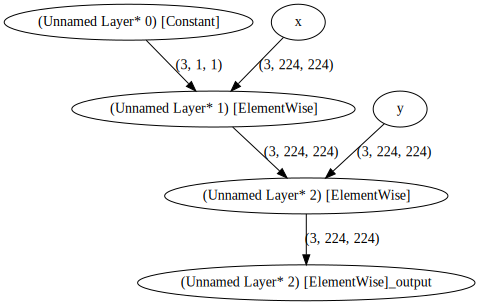

In [219]:
trt_network_to_dot_graph(net.network)

In [190]:
graph

graph(%self : ClassType<MyModule>,
      %x : Float(1, 3, 224, 224)):
  %2 : Float(1, 3, 1, 1) = prim::Constant[value=(1,1,.,.) =   -1.1048  (1,2,.,.) =    0.4352  (1,3,.,.) =    0.5167 [ Variable[CPUFloatType]{1,3,1,1} ]](), scope: MyModule # <ipython-input-104-0e0d3c77cb20>:8:0
  %3 : Float(1, 3, 224, 224) = aten::mul(%x, %2), scope: MyModule # <ipython-input-104-0e0d3c77cb20>:8:0
  return (%3)

In [166]:
t = val.type()

In [170]:
va.

'Float'

In [168]:
n = val.node()

In [172]:
n.attributeNames()

[]

In [169]:
val.type.

<bound method PyCapsule.type of x defined in (%self : ClassType<MyModule>, %x : Float(1, 3, 224, 224) = prim::Param()
)>

In [140]:
import pdb
pdb.pm()

> <ipython-input-106-23400b74a02b>(24)get_trt()
-> return self.tensors[val.debugName()]  # tensor should now be set...


(Pdb)  print self.tensors


*** SyntaxError: Missing parentheses in call to 'print'. Did you mean print(self.tensors)?


(Pdb)  p self.tensors


{}


(Pdb)  q


In [135]:
graph

graph(%self : ClassType<MyModule>,
      %x : Float(1, 3, 224, 224)):
  %2 : Float(1, 3, 1, 1) = prim::Constant[value=(1,1,.,.) =   -1.1048  (1,2,.,.) =    0.4352  (1,3,.,.) =    0.5167 [ Variable[CPUFloatType]{1,3,1,1} ]](), scope: MyModule # <ipython-input-104-0e0d3c77cb20>:8:0
  %3 : Float(1, 3, 224, 224) = aten::mul(%x, %2), scope: MyModule # <ipython-input-104-0e0d3c77cb20>:8:0
  return (%3)

In [159]:
queue = []
call_trace = []

queue += graph_outputs(graph)

while queue:
    val = queue.pop(0)
    queue += val_inputs(val)
    print(val)
    
    if val_kind(val) == 'prim::Constant':
        break

11 defined in (%11 : Float(1, 3, 224, 224) = aten::mul(%9, %10), scope: MyModule # <ipython-input-78-2efbdc103968>:8:0
)
9 defined in (%9 : Float(1, 3, 224, 224) = aten::mul(%x, %8), scope: MyModule # <ipython-input-78-2efbdc103968>:8:0
)
10 defined in (%10 : Float(1, 3, 1, 1) = prim::Constant[value=(1,1,.,.) =   -0.5971  (1,2,.,.) =    0.3635  (1,3,.,.) =    0.4893 [ Variable[CPUFloatType]{1,3,1,1} ]](), scope: MyModule # <ipython-input-78-2efbdc103968>:8:0
)
